In [1]:
# HBM

In [2]:
%%bash
curr_dir=$PWD
der_dir="/home/orco/data/kinderseg/HBN_MRI/derivatives/fastsurfer"
cd $der_dir
subs=($( ls -1d sub*))
export SUBJECTS_DIR=$PWD
cd $curr_dir
asegstats2table --common-segs --meas volume --skip --all-segs\
                --tablefile ./HBM_fastsurfer_aseg.volume.stats.csv \
                --statsfile=aparc.DKTatlas+aseg.deep.volume.stats \
                --subjects "${subs[@]}"
asegstats2table --common-segs --meas volume --skip \
                 --tablefile ./HBM_fastsurfer_brainvol.csv \
                 --statsfile=brainvol.stats \
                 --subjects "${subs[@]}"

SUBJECTS_DIR : /home/orco/data/kinderseg/HBN_MRI/derivatives/fastsurfer
Parsing the .stats files
Skipping /home/orco/data/kinderseg/HBN_MRI/derivatives/fastsurfer/sub-NDARBN100LCD/stats/aparc.DKTatlas+aseg.deep.volume.stats
Skipping /home/orco/data/kinderseg/HBN_MRI/derivatives/fastsurfer/sub-NDAREK549XUQ/stats/aparc.DKTatlas+aseg.deep.volume.stats
Skipping /home/orco/data/kinderseg/HBN_MRI/derivatives/fastsurfer/sub-NDARGA563XVW/stats/aparc.DKTatlas+aseg.deep.volume.stats
Skipping /home/orco/data/kinderseg/HBN_MRI/derivatives/fastsurfer/sub-NDARJJ343TR0/stats/aparc.DKTatlas+aseg.deep.volume.stats
Skipping /home/orco/data/kinderseg/HBN_MRI/derivatives/fastsurfer/sub-NDARLP507NKW/stats/aparc.DKTatlas+aseg.deep.volume.stats
Skipping /home/orco/data/kinderseg/HBN_MRI/derivatives/fastsurfer/sub-NDARLU606ZDD/stats/aparc.DKTatlas+aseg.deep.volume.stats
Skipping /home/orco/data/kinderseg/HBN_MRI/derivatives/fastsurfer/sub-NDARMZ518UH1/stats/aparc.DKTatlas+aseg.deep.volume.stats
Skipping /home

In [3]:
%%bash
curr_dir=$PWD
der_dir="/home/orco/data/kinderseg/HBN_MRI/derivatives/freesurfer"
cd $der_dir
subs=($( ls -1d sub*))
export SUBJECTS_DIR=$PWD
cd $curr_dir
asegstats2table --common-segs --meas volume --skip --all-segs\
                --tablefile ./HBM_freesurfer_aseg.volume.stats.csv \
                --statsfile=aseg.stats \
                --subjects "${subs[@]}"

ERROR: subjects are not specified (use --subjects SUBJECTS)


bash: line 3: cd: /home/orco/data/kinderseg/HBN_MRI/derivatives/freesurfer: No such file or directory
ls: cannot access 'sub*': No such file or directory


CalledProcessError: Command 'b'curr_dir=$PWD\nder_dir="/home/orco/data/kinderseg/HBN_MRI/derivatives/freesurfer"\ncd $der_dir\nsubs=($( ls -1d sub*))\nexport SUBJECTS_DIR=$PWD\ncd $curr_dir\nasegstats2table --common-segs --meas volume --skip --all-segs\\\n                --tablefile ./HBM_freesurfer_aseg.volume.stats.csv \\\n                --statsfile=aseg.stats \\\n                --subjects "${subs[@]}"\n'' returned non-zero exit status 1.

In [4]:
import pandas as pd
import numpy as np
#import cupy as cp
import os, glob

cutoff = 2.698

In [5]:
# Fastsurfer Outliers

In [6]:
segtable = pd.read_csv('./HBM_fastsurfer_aseg.volume.stats.csv', sep='\t')
segtable.head()

,Measure:volume,Left-Cerebral-White-Matter,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,...,ctx-rh-precentral,ctx-rh-precuneus,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-transversetemporal,ctx-rh-insula
0,sub-NDARAA075AMK,198383.4,3972.8,359.9,11274.1,56049.0,7310.8,3694.4,6110.7,1950.4,...,14513.9,12469.4,2428.4,17579.4,35267.0,13279.9,18056.0,11765.1,947.4,6630.1
1,sub-NDARAE012DGA,202093.5,7886.4,536.1,10658.8,53680.1,6963.2,3149.7,5033.3,1777.7,...,15471.5,12678.3,3310.3,18272.7,30585.2,12793.8,20479.4,12121.7,1257.4,8774.9
2,sub-NDARAM277WZT,189589.8,2515.5,507.9,12613.5,55760.1,6869.2,3351.4,4231.3,1757.3,...,12112.3,10890.6,2534.2,14241.1,27762.7,12207.2,15891.9,11040.6,1085.9,6321.4
3,sub-NDARAM675UR8,195606.9,3375.4,201.4,11994.3,56927.1,7621.0,3706.1,5673.1,1616.6,...,10960.2,12188.0,1889.2,8070.2,30656.1,9687.5,16468.6,6969.5,725.0,6890.6
4,sub-NDARAP522AFK,236770.9,7378.7,375.7,14373.9,63376.3,8228.2,4146.8,6060.7,2241.6,...,15114.0,13551.6,3176.1,15516.2,33791.5,14126.3,18356.0,12113.4,1040.0,7651.5


In [7]:
len(segtable)

185

In [146]:
braintable = pd.read_csv('HBM_fastsurfer_brainvol.csv', sep='\t')
braintable.head()

,Measure:volume,BrainSegVol,BrainSegVolNotVent,SupraTentorialVol,SupraTentorialVolNotVent,SubCortGrayVol,lhCortexVol,rhCortexVol,CortexVol,TotalGrayVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,MaskVol,SupraTentorialVolNotVentVox,BrainSegVolNotVentSurf
0,sub-NDARAA075AMK,1186166.0,1175379.0,1.053909e+06,1.046277e+06,59128.0,289849.077526,296688.400946,586537.478472,755665.478472,199020.784162,200045.934918,399066.719080,1409845.0,1043975.0,1.176136e+06
1,sub-NDARAE012DGA,1183320.0,1166712.0,1.057228e+06,1.042756e+06,55690.0,294188.023430,291726.418993,585914.442423,746618.442423,199195.012602,200665.862652,399860.875254,1410785.0,1041101.0,1.167076e+06
2,sub-NDARAM675UR8,1043954.0,1034592.0,9.094569e+05,9.029319e+05,58152.0,233978.988654,219774.292483,453753.281137,621968.281137,190533.667523,198797.961673,389331.629196,1303616.0,902452.0,1.033377e+06
3,sub-NDARAX283MAK,1112194.0,1100179.0,9.833893e+05,9.742543e+05,59647.0,267106.928569,272236.730605,539343.659174,705734.659174,188178.584919,185433.049440,373611.634359,1324535.0,972454.0,1.100327e+06
4,sub-NDARBA521RA8,1174483.0,1163683.0,1.040355e+06,1.032423e+06,61306.0,285400.608585,288956.918698,574357.527282,745584.527282,197420.680080,198081.354243,395502.034323,1411617.0,1030305.0,1.164544e+06


In [147]:
len(braintable)

68

In [148]:
fastsurfer = segtable.join(braintable.set_index('Measure:volume'), on='Measure:volume')
fastsurfer.head()

,Measure:volume,Left-Cerebral-White-Matter,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,...,lhCortexVol,rhCortexVol,CortexVol,TotalGrayVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,MaskVol,SupraTentorialVolNotVentVox,BrainSegVolNotVentSurf
0,sub-NDARAA075AMK,198383.4,3972.8,359.9,11274.1,56049.0,7310.8,3694.4,6110.7,1950.4,...,289849.077526,296688.400946,586537.478472,755665.478472,199020.784162,200045.934918,399066.719080,1409845.0,1043975.0,1.176136e+06
1,sub-NDARAE012DGA,202093.5,7886.4,536.1,10658.8,53680.1,6963.2,3149.7,5033.3,1777.7,...,294188.023430,291726.418993,585914.442423,746618.442423,199195.012602,200665.862652,399860.875254,1410785.0,1041101.0,1.167076e+06
2,sub-NDARAM277WZT,189589.8,2515.5,507.9,12613.5,55760.1,6869.2,3351.4,4231.3,1757.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub-NDARAM675UR8,195606.9,3375.4,201.4,11994.3,56927.1,7621.0,3706.1,5673.1,1616.6,...,233978.988654,219774.292483,453753.281137,621968.281137,190533.667523,198797.961673,389331.629196,1303616.0,902452.0,1.033377e+06
4,sub-NDARAP522AFK,236770.9,7378.7,375.7,14373.9,63376.3,8228.2,4146.8,6060.7,2241.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
fastsurfer['ids'] = fastsurfer['Measure:volume'] 

In [95]:
d = dict()
dd = dict()
for i in [i for i in fastsurfer.columns if not 'BrainSeg' in i]:
    if fastsurfer[i].dtype == 'float':
        rel_vol = fastsurfer[i].values #/ fastsurfer['MaskVol'].values
        median = np.median(rel_vol)
        stddev = rel_vol.std()
        outliers = (rel_vol > median + 2.698*stddev) | (rel_vol < median - 2.698*stddev )
        #print(outliers.sum())
        d[i] = fastsurfer['ids'].values[outliers]
        for sub in fastsurfer['ids'].values[outliers]:
            if sub in dd.keys():
                dd[sub] += 1
            else:
                dd[sub] = 1

In [100]:
fastsurfer_outliers = pd.DataFrame.from_dict(d, orient='index')
fastsurfer_outliers2 = pd.DataFrame.from_dict(dd, orient='index')
#fastsurfer_outliers2

In [102]:
fastsurfer_outliers.to_excel('HBM_fastsurfer_outliers_byROI.xlsx')
fastsurfer_outliers2.to_excel('HBM_fastsurfer_outliers_bySubID.xlsx')

In [81]:
# Correlation Freesurfer /Fastsurfer

In [149]:
fssegtable = pd.read_csv('./HBM_freesurfer_aseg.volume.stats.csv', sep='\t')
fssegtable.head()

,Measure:volume,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol
0,sub-NDARAA075AMK.reconall,3912.6,362.7,11357.4,54859.3,7478.1,3676.5,5793.4,1917.6,616.4,...,1.043397e+06,1.035651e+06,1032816.0,1501979.0,0.820625,1.050174,84.0,68.0,152.0,1.430219e+06
1,sub-NDARAE012DGA.reconall,8269.8,567.6,10668.0,51692.4,6665.7,3234.4,4481.6,1908.1,478.7,...,1.048532e+06,1.033297e+06,1031168.0,1501002.0,0.818527,1.049670,37.0,29.0,66.0,1.429975e+06
2,sub-NDARAM277WZT.reconall,2674.2,447.3,11698.0,54430.8,6526.7,3129.1,4208.6,1629.1,1053.3,...,9.567844e+05,9.491644e+05,947064.0,1446636.0,0.764037,1.014926,28.0,24.0,52.0,1.425361e+06
3,sub-NDARAM675UR8.reconall,3725.6,243.7,12846.3,56058.7,7895.5,3618.3,5486.3,1724.2,703.5,...,9.499617e+05,9.423527e+05,939895.0,1499044.0,0.763939,1.051622,214.0,246.0,460.0,1.425459e+06
4,sub-NDARAT100AEQ.reconall,4066.4,245.2,11493.0,52805.0,8014.8,3968.0,5549.0,1879.3,969.1,...,1.039008e+06,1.030429e+06,1027755.0,1568406.0,0.744253,0.998483,21.0,30.0,51.0,1.570788e+06


In [172]:
fssegtable['ids'] = fssegtable['Measure:volume'].apply(lambda x: x.replace('.reconall',''))

In [173]:
from scipy.stats import pearsonr
import seaborn as sns

In [174]:
i = 'Left-Lateral-Ventricle'

In [177]:
dfx = fastsurfer[['ids',i]]
dfx.columns = ['ids', 'x']
dfy = fssegtable[['ids',i]]
dfy.columns = ['ids', 'y']
df = dfx.join(dfy.set_index('ids'), on='ids').dropna()
corr = pearsonr(df.x, df.y)
corr


(0.9936268680666244, 1.6228842063288228e-79)

In [180]:
d=dict()
for i in [i for i in fastsurfer.columns if not 'BrainSeg' in i]:
    try:
        dfx = fastsurfer[['ids',i]]
        dfx.columns = ['ids', 'x']
        dfy = fssegtable[['ids',i]]
        dfy.columns = ['ids', 'y']
        df = dfx.join(dfy.set_index('ids'), on='ids').dropna()
        print(len(df))
        corr = pearsonr(df.x, df.y)
        d[i] = corr
    except:
        print('error: ', i)

84
error:  Measure:volume
error:  Left-Cerebral-White-Matter
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
error:  Right-Cerebral-White-Matter
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
error:  ctx-lh-caudalanteriorcingulate
error:  ctx-lh-caudalmiddlefrontal
error:  ctx-lh-cuneus
error:  ctx-lh-entorhinal
error:  ctx-lh-fusiform
error:  ctx-lh-inferiorparietal
error:  ctx-lh-inferiortemporal
error:  ctx-lh-isthmuscingulate
error:  ctx-lh-lateraloccipital
error:  ctx-lh-lateralorbitofrontal
error:  ctx-lh-lingual
error:  ctx-lh-medialorbitofrontal
error:  ctx-lh-middletemporal
error:  ctx-lh-parahippocampal
error:  ctx-lh-paracentral
error:  ctx-lh-parsopercularis
error:  ctx-lh-parsorbitalis
error:  ctx-lh-parstriangularis
error:  ctx-lh-pericalcarine
error:  ctx-lh-postcentral
error:  ctx-lh-posteriorcingulate
error:  ctx-lh-precentral
error:  ctx-lh-precuneus
error:  ctx-lh-rostralanteriorcingulate
error:  ctx-lh-rostralmiddlefrontal
error:  ctx-lh-superiorfrontal

In [184]:
min(list(d.values()))

(0.6620218322108833, 7.030403194133258e-12)

In [185]:
max(list(d.values()))

(0.9940997215322271, 6.944040856460574e-81)

In [186]:
d

{'Left-Lateral-Ventricle': (0.9936268680666244, 1.6228842063288228e-79),
 'Left-Inf-Lat-Vent': (0.8775491560018608, 6.646366521698963e-28),
 'Left-Cerebellum-White-Matter': (0.9172265484687203, 1.5973753063801474e-34),
 'Left-Cerebellum-Cortex': (0.9882298904380076, 1.2242174786636992e-68),
 'Left-Thalamus-Proper': (0.8853155070368415, 5.316603381902581e-29),
 'Left-Caudate': (0.9512153698371079, 1.2218142895949289e-43),
 'Left-Putamen': (0.9364315677648339, 4.6935349085863776e-39),
 'Left-Pallidum': (0.829339780576399, 1.968582979701681e-22),
 '3rd-Ventricle': (0.9691415933663914, 1.2208327694125116e-51),
 '4th-Ventricle': (0.9374256618859591, 2.5092019974642454e-39),
 'Brain-Stem': (0.9708445682481179, 1.2316595574051346e-52),
 'Left-Hippocampus': (0.9637420879977295, 8.153228241466241e-49),
 'Left-Amygdala': (0.8472451772811799, 3.0548407717486255e-24),
 'CSF': (0.9244938333768271, 4.277471585544818e-36),
 'Left-Accumbens-area': (0.7526777779114039, 1.5093922416506107e-16),
 'Left-V

In [187]:
pd.DataFrame(d).to_csv('free-fast-surfer-corr.csv')

In [138]:
len(d)

100

In [193]:
i = 'CC_Central'

(0.6620218322108833, 7.030403194133258e-12)


/home/orco/anaconda3/envs/fastsurfer/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

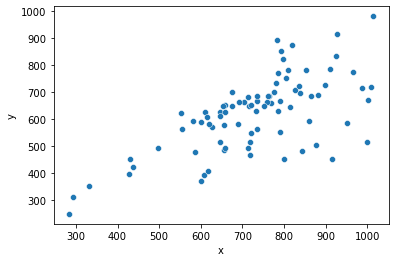

In [194]:
dfx = fastsurfer[['ids',i]]
dfx.columns = ['ids', 'x']
dfy = fssegtable[['ids',i]]
dfy.columns = ['ids', 'y']
df = dfx.join(dfy.set_index('ids'), on='ids').dropna()
print(pearsonr(df.x, df.y))
sns.scatterplot(df.x, df.y)

In [140]:
df.x

0      3972.8
1      2104.5
2      7886.4
3      2515.5
4      3375.4
        ...  
211    4370.7
212    7487.8
213    4154.3
214     770.3
215    4518.2
Name: x, Length: 216, dtype: float64

In [141]:
df.y

0      3972.8
1      2104.5
2      7886.4
3      2515.5
4      3375.4
        ...  
211    4370.7
212    7487.8
213    4154.3
214     770.3
215    4518.2
Name: y, Length: 216, dtype: float64